In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:

from sklearn.preprocessing import LabelEncoder

from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df_weather_features = pd.read_csv( '/content/weatherdata_file.csv')


df_energy_features = pd.read_csv( '/content/energy_dataset.csv',)

In [ ]:
df_weather_features.head()

Unnamed: 0                     dt_iso city_name     temp  temp_min  \
0           0  2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   
1           1  2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   
2           2  2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   
3           3  2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   
4           4  2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   

   temp_max  pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
0   270.475      1001        77           1        62      0.0      0.0   
1   270.475      1001        77           1        62      0.0      0.0   
2   269.686      1002        78           0        23      0.0      0.0   
3   269.686      1002        78           0        23      0.0      0.0   
4   269.686      1002        78           0        23      0.0      0.0   

   snow_3h  clouds_all  weather_id weather_main weather_description  \
0      0.0           0         800        clear        sky is clear   
1      0.0           0         800        clear        sky is clear   
2      0.0           0         800        clear        sky is clear   
3      0.0           0         800        clear        sky is clear   
4      0.0           0         800        clear        sky is clear   

  weather_icon  holiday  
0          01n        1  
1          01n        1  
2          01n        1  
3          01n        1  
4          01n        1

In [ ]:
df_weather_features.shape

(178396, 19)

In [ ]:
df_weather_features.columns

Index(['Unnamed: 0', 'dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon', 'holiday'],
      dtype='object')

In [ ]:
df_weather_features = df_weather_features.drop(['Unnamed: 0'], axis=1, errors='ignore')
print(df_weather_features)

                           dt_iso city_name     temp  temp_min  temp_max  \
0       2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   270.475   
1       2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475   
2       2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   269.686   
3       2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686   
4       2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686   
...                           ...       ...      ...       ...       ...   
178391  2018-12-31 18:00:00+00:00   Seville  287.760   287.150   288.150   
178392  2018-12-31 19:00:00+00:00   Seville  285.760   285.150   286.150   
178393  2018-12-31 20:00:00+00:00   Seville  285.150   285.150   285.150   
178394  2018-12-31 21:00:00+00:00   Seville  284.150   284.150   284.150   
178395  2018-12-31 22:00:00+00:00   Seville  283.970   282.150   285.150   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0       

In [ ]:
df_weather_features.duplicated().sum()

21

In [ ]:
df_weather_features=df_weather_features.drop_duplicates()

In [ ]:
df_weather_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178375 entries, 0 to 178395
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178375 non-null  object 
 1   city_name            178375 non-null  object 
 2   temp                 178375 non-null  float64
 3   temp_min             178375 non-null  float64
 4   temp_max             178375 non-null  float64
 5   pressure             178375 non-null  int64  
 6   humidity             178375 non-null  int64  
 7   wind_speed           178375 non-null  int64  
 8   wind_deg             178375 non-null  int64  
 9   rain_1h              178375 non-null  float64
 10  rain_3h              178375 non-null  float64
 11  snow_3h              178375 non-null  float64
 12  clouds_all           178375 non-null  int64  
 13  weather_id           178375 non-null  int64  
 14  weather_main         178375 non-null  object 
 15  weather_description  1

In [ ]:
df_weather_features.nunique()

dt_iso                 35064
city_name                  5
temp                   20743
temp_min               18553
temp_max               18591
pressure                 190
humidity                 100
wind_speed                36
wind_deg                 361
rain_1h                    7
rain_3h                   89
snow_3h                   66
clouds_all                97
weather_id                38
weather_main              12
weather_description       43
weather_icon              24
holiday                    2
dtype: int64

In [ ]:
def df_convert_dtypes(df, convert_from, convert_to):
  values = df.select_dtypes(include=[convert_from]).columns
  for val in values:
         df[val] = df[val].astype(convert_to)

  return df

In [ ]:
df_weather_features = df_convert_dtypes(df_weather_features, np.int64, np.float64)

In [ ]:
df_weather_features = (df_weather_features.assign(time=pd.to_datetime(df_weather_features['dt_iso'], utc=True, infer_datetime_format=True)).drop(columns=['dt_iso']).set_index('time'))


<ipython-input-253-8c78dc69c458>:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [ ]:
missingvalues = df_weather_features.isnull().sum().sum()
print(f'There are {missingvalues} missing values or NaNs in df_weather_features.')

There are 0 missing values or NaNs in df_weather_features.


In [ ]:
duplicaterows = df_weather_features.duplicated().sum()


print(f'There are {duplicaterows} duplicate rows in df_weather_features.')

There are 8442 duplicate rows in df_weather_features.


In [ ]:
weather_description_unique = df_weather_features['weather_description'].unique()
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'proximity thunderstorm', 'thunderstorm',
       'light intensity shower rain', 'light intensity drizzle', 'fog',
       'drizzle', 'smoke', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light intensity drizzle rain',
       'light snow', 'rain and snow', 'light rain and snow', 'snow',
       'light thunderstorm', 'heavy snow', 'sleet', 'rain and drizzle',
       'shower sleet', 'light shower sleet', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain',
       'sand dust whirls', 'proximity drizzle', 'dust', 'squalls'],
      dtype=object)

In [ ]:
weather_uniqueid = df_weather_features['weather_id'].unique()
weather_uniqueid

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 201., 211., 520., 300., 741., 301., 711., 302.,
       721., 310., 600., 616., 615., 601., 210., 602., 611., 311., 612.,
       620., 531., 731., 761., 771.])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def feat_corr(input_df):

    numeric_df = input_df.select_dtypes(include=np.number)


    corr = numeric_df.corr()


    plt.figure(figsize=(15, 12))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlGn', vmin=-1, vmax=1,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

    plt.title('Feature Correlation', fontsize=16)
    plt.tight_layout()

    plt.show()


In [ ]:
df_temp = df_weather_features.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather_features[col])

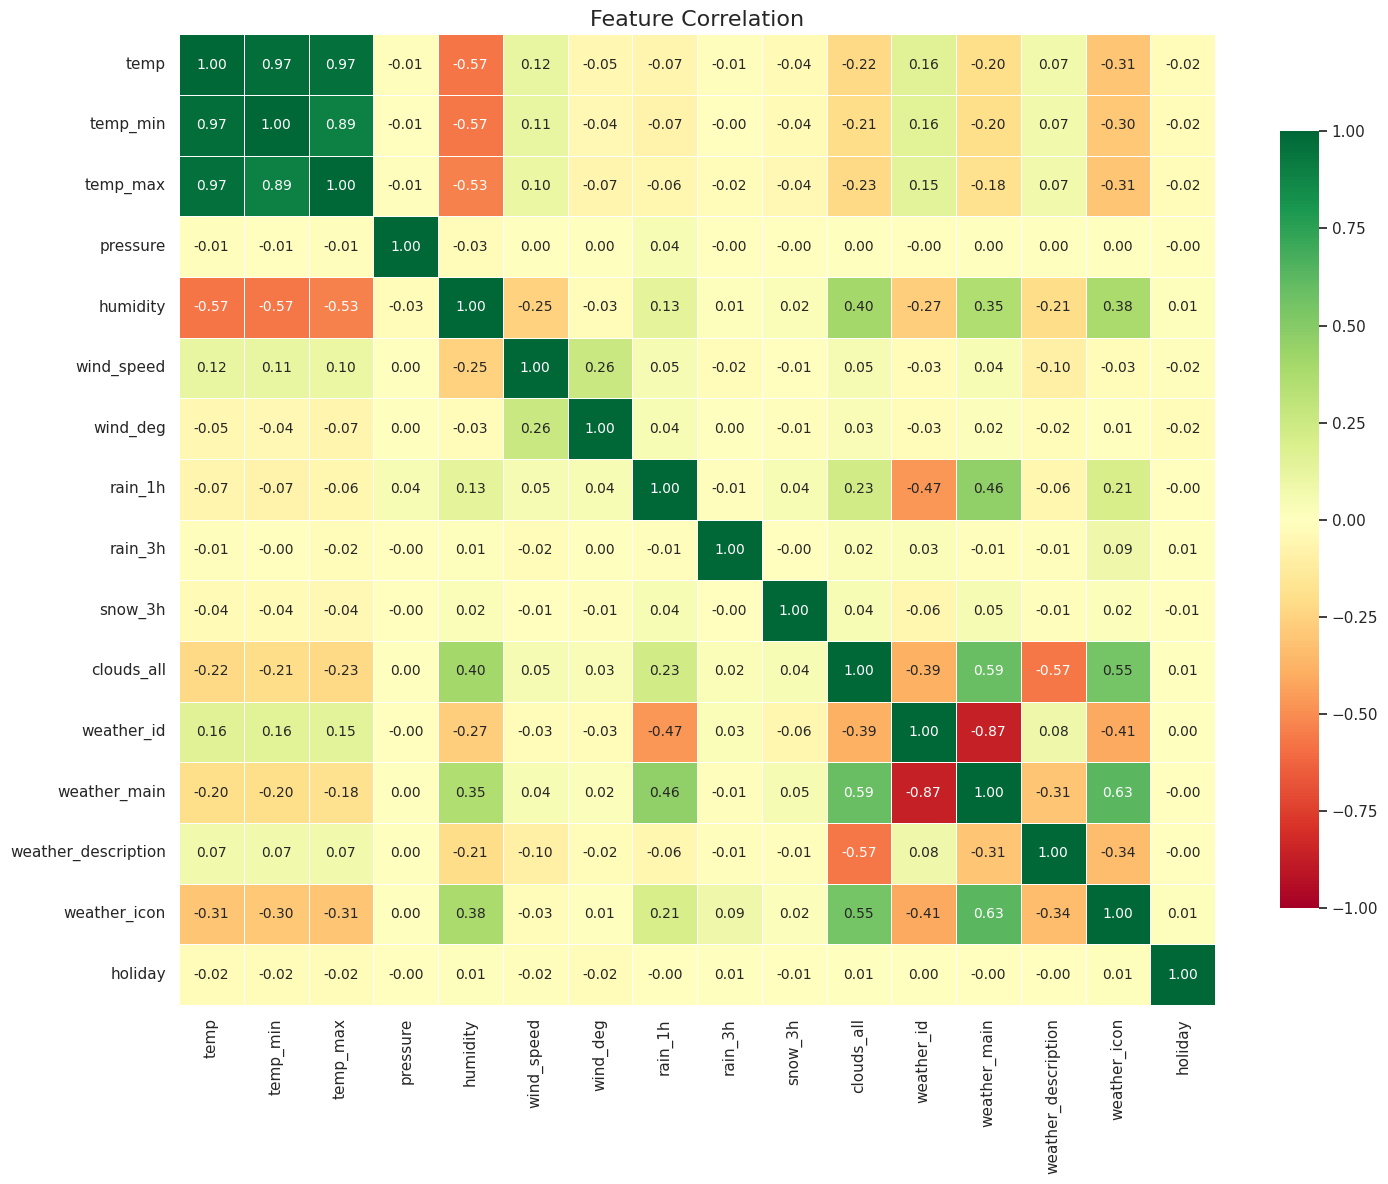

In [ ]:
feat_corr(df_temp)

In [ ]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
# col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon']
df_weather_features.drop(col_drop_name, axis = 1 , inplace = True)

In [ ]:
missingvalues = df_weather_features.isnull().sum().sum()
print(f'There are {missingvalues} missing values or NaNs in df_weather_features.')

There are 0 missing values or NaNs in df_weather_features.


In [ ]:
duplicaterows = df_weather_features.duplicated().sum()


print(f'There are {duplicaterows} duplicate rows in df_weather_features.')

There are 12907 duplicate rows in df_weather_features.


In [ ]:
df_weather_features = df_weather_features.reset_index().drop_duplicates()

In [ ]:
df_weather_features

time city_name     temp  pressure  humidity  \
0      2014-12-31 23:00:00+00:00  Valencia  270.475    1001.0      77.0   
1      2015-01-01 00:00:00+00:00  Valencia  270.475    1001.0      77.0   
2      2015-01-01 01:00:00+00:00  Valencia  269.686    1002.0      78.0   
3      2015-01-01 02:00:00+00:00  Valencia  269.686    1002.0      78.0   
4      2015-01-01 03:00:00+00:00  Valencia  269.686    1002.0      78.0   
...                          ...       ...      ...       ...       ...   
178370 2018-12-31 18:00:00+00:00   Seville  287.760    1028.0      54.0   
178371 2018-12-31 19:00:00+00:00   Seville  285.760    1029.0      62.0   
178372 2018-12-31 20:00:00+00:00   Seville  285.150    1028.0      58.0   
178373 2018-12-31 21:00:00+00:00   Seville  284.150    1029.0      57.0   
178374 2018-12-31 22:00:00+00:00   Seville  283.970    1029.0      70.0   

        wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  holiday  
0              1.0      62.0      0.0      0.0      0.0         0.0      1.0  
1              1.0      62.0      0.0      0.0      0.0         0.0      1.0  
2              0.0      23.0      0.0      0.0      0.0         0.0      1.0  
3              0.0      23.0      0.0      0.0      0.0         0.0      1.0  
4              0.0      23.0      0.0      0.0      0.0         0.0      1.0  
...            ...       ...      ...      ...      ...         ...      ...  
178370         3.0      30.0      0.0      0.0      0.0         0.0      1.0  
178371         3.0      30.0      0.0      0.0      0.0         0.0      1.0  
178372         4.0      50.0      0.0      0.0      0.0         0.0      1.0  
178373         4.0      60.0      0.0      0.0      0.0         0.0      1.0  
178374         3.0      50.0      0.0      0.0      0.0         0.0      1.0  

[175320 rows x 12 columns]

In [ ]:
df_energy_features.shape

(35064, 29)

In [ ]:
df_energy_features.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [ ]:
df_energy_features.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
df_energy_features.duplicated().sum()

0

In [ ]:
df_energy_features.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                                  19
generation wind offshore                          18
generation wind onshore                           18
forecast solar day ahead                           0
forecast wind offshore eday ahead              35064
forecast wind onshore day ahead                    0
total load forecast                                0
total load actual                                 36
price day ahead                                    0
price actual                                       0
dtype: int64

In [ ]:
df_energy_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [ ]:

df_energy_features['time'] = pd.to_datetime(df_energy_features['time'], utc=True, infer_datetime_format=True)
df_energy_features= df_energy_features.set_index('time')

<ipython-input-272-5d91c7a4741e>:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [ ]:
df_energy_features.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

In [ ]:
df_energy_features.nunique()

generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage aggregated         0
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                                 262
generation wind offshore                           1
generation wind onshore                        11465
forecast solar day ahead                        5356
forecast wind offshore eday ahead                  0
forecast wind onshore day ahead                11332
total load forecast                            14790
total load actual                              15127
price day ahead                                 5747
price actual                                    6653
dtype: int64

In [ ]:
# columns to be removed due to all 0 or Nan values
columns = ['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat',
           'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine',
           'generation wind offshore', 'forecast wind offshore eday ahead', 'forecast solar day ahead',
            'forecast wind onshore day ahead']

In [ ]:
df_energy_features = df_energy_features.drop(columns, axis = 1)

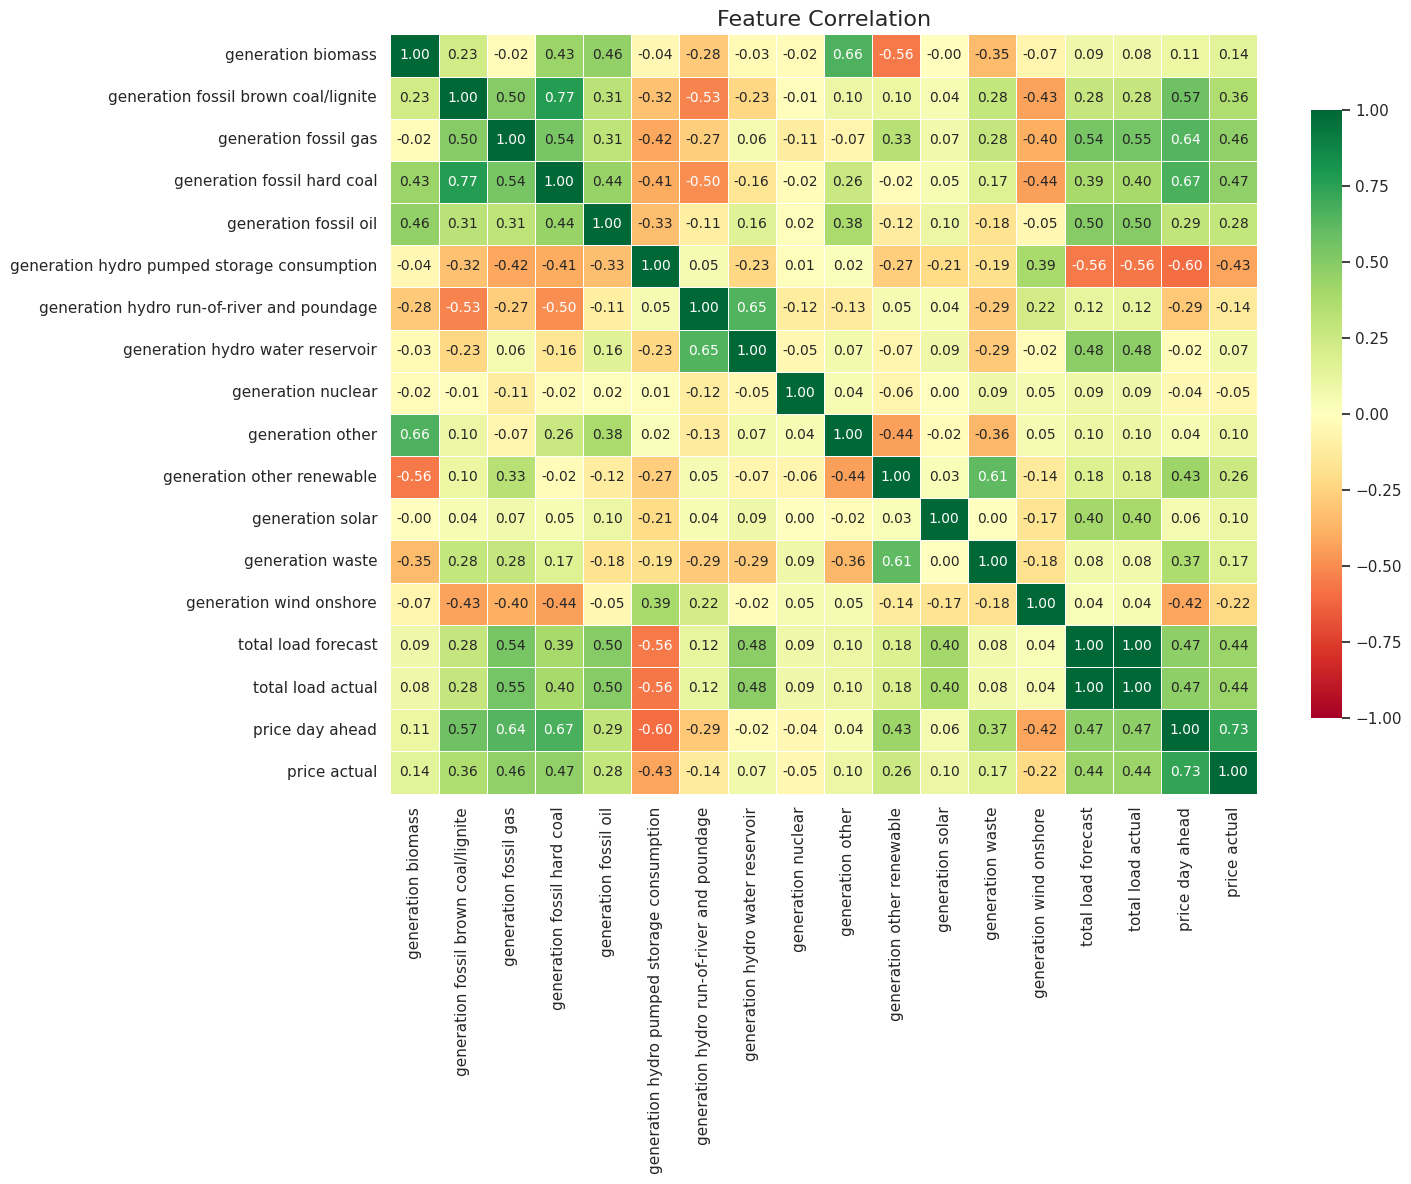

In [ ]:
feat_corr(df_energy_features)

In [ ]:
df_energy_features.duplicated().sum()

0

In [ ]:
df_energy_features.isnull().sum(axis=0)

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [ ]:
df_energy_features

generation biomass  \
time                                            
2014-12-31 23:00:00+00:00               447.0   
2015-01-01 00:00:00+00:00               449.0   
2015-01-01 01:00:00+00:00               448.0   
2015-01-01 02:00:00+00:00               438.0   
2015-01-01 03:00:00+00:00               428.0   
...                                       ...   
2018-12-31 18:00:00+00:00               297.0   
2018-12-31 19:00:00+00:00               296.0   
2018-12-31 20:00:00+00:00               292.0   
2018-12-31 21:00:00+00:00               293.0   
2018-12-31 22:00:00+00:00               290.0   

                           generation fossil brown coal/lignite  \
time                                                              
2014-12-31 23:00:00+00:00                                 329.0   
2015-01-01 00:00:00+00:00                                 328.0   
2015-01-01 01:00:00+00:00                                 323.0   
2015-01-01 02:00:00+00:00                                 254.0   
2015-01-01 03:00:00+00:00                                 187.0   
...                                                         ...   
2018-12-31 18:00:00+00:00                                   0.0   
2018-12-31 19:00:00+00:00                                   0.0   
2018-12-31 20:00:00+00:00                                   0.0   
2018-12-31 21:00:00+00:00                                   0.0   
2018-12-31 22:00:00+00:00                                   0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2014-12-31 23:00:00+00:00                 4844.0                       4821.0   
2015-01-01 00:00:00+00:00                 5196.0                       4755.0   
2015-01-01 01:00:00+00:00                 4857.0                       4581.0   
2015-01-01 02:00:00+00:00                 4314.0                       4131.0   
2015-01-01 03:00:00+00:00                 4130.0                       3840.0   
...                                          ...                          ...   
2018-12-31 18:00:00+00:00                 7634.0                       2628.0   
2018-12-31 19:00:00+00:00                 7241.0                       2566.0   
2018-12-31 20:00:00+00:00                 7025.0                       2422.0   
2018-12-31 21:00:00+00:00                 6562.0                       2293.0   
2018-12-31 22:00:00+00:00                 6926.0                       2166.0   

                           generation fossil oil  \
time                                               
2014-12-31 23:00:00+00:00                  162.0   
2015-01-01 00:00:00+00:00                  158.0   
2015-01-01 01:00:00+00:00                  157.0   
2015-01-01 02:00:00+00:00                  160.0   
2015-01-01 03:00:00+00:00                  156.0   
...                                          ...   
2018-12-31 18:00:00+00:00                  178.0   
2018-12-31 19:00:00+00:00                  174.0   
2018-12-31 20:00:00+00:00                  168.0   
2018-12-31 21:00:00+00:00                  163.0   
2018-12-31 22:00:00+00:00                  163.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2014-12-31 23:00:00+00:00                                        863.0   
2015-01-01 00:00:00+00:00                                        920.0   
2015-01-01 01:00:00+00:00                                       1164.0   
2015-01-01 02:00:00+00:00                                       1503.0   
2015-01-01 03:00:00+00:00                                       1826.0   
...                                                                ...   
2018-12-31 18:00:00+00:00                                          1.0   
2018-12-31 19:00:00+00:00                                          1.0   
2018-12-31 20:00:00+00:00                     

In [ ]:

df_energy_features[df_energy_features.isna().any(axis=1)]

generation biomass  \
time                                            
2015-01-05 02:00:00+00:00                 NaN   
2015-01-05 11:00:00+00:00                 NaN   
2015-01-05 12:00:00+00:00                 NaN   
2015-01-05 13:00:00+00:00                 NaN   
2015-01-05 14:00:00+00:00                 NaN   
2015-01-05 15:00:00+00:00                 NaN   
2015-01-05 16:00:00+00:00                 NaN   
2015-01-19 18:00:00+00:00                 NaN   
2015-01-19 19:00:00+00:00                 NaN   
2015-01-27 18:00:00+00:00                 NaN   
2015-01-28 12:00:00+00:00                 NaN   
2015-02-01 06:00:00+00:00               449.0   
2015-02-01 07:00:00+00:00               453.0   
2015-02-01 08:00:00+00:00               452.0   
2015-02-01 11:00:00+00:00               405.0   
2015-02-01 12:00:00+00:00               402.0   
2015-02-01 13:00:00+00:00               400.0   
2015-02-01 14:00:00+00:00               393.0   
2015-02-01 15:00:00+00:00               413.0   
2015-02-01 16:00:00+00:00               465.0   
2015-02-01 17:00:00+00:00               482.0   
2015-02-01 18:00:00+00:00               474.0   
2015-04-05 01:00:00+00:00               371.0   
2015-04-16 07:00:00+00:00                 NaN   
2015-04-20 06:00:00+00:00               424.0   
2015-04-23 19:00:00+00:00                 NaN   
2015-05-02 08:00:00+00:00               497.0   
2015-05-29 01:00:00+00:00               569.0   
2015-06-15 07:00:00+00:00                 NaN   
2015-10-02 06:00:00+00:00               483.0   
2015-10-02 09:00:00+00:00                 NaN   
2015-12-02 08:00:00+00:00                 NaN   
2016-04-13 03:00:00+00:00               220.0   
2016-04-25 03:00:00+00:00               190.0   
2016-04-25 05:00:00+00:00               206.0   
2016-05-10 21:00:00+00:00               348.0   
2016-06-11 23:00:00+00:00               356.0   
2016-07-09 20:00:00+00:00                 NaN   
2016-07-11 22:00:00+00:00               346.0   
2016-09-28 07:00:00+00:00               347.0   
2016-10-27 21:00:00+00:00               351.0   
2016-11-23 03:00:00+00:00                 NaN   
2017-11-14 11:00:00+00:00                 0.0   
2017-11-14 18:00:00+00:00                 0.0   
2018-06-11 16:00:00+00:00               331.0   
2018-07-11 07:00:00+00:00                 NaN   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-05 02:00:00+00:00                                   NaN   
2015-01-05 11:00:00+00:00                                   NaN   
2015-01-05 12:00:00+00:00                                   NaN   
2015-01-05 13:00:00+00:00                                   NaN   
2015-01-05 14:00:00+00:00                                   NaN   
2015-01-05 15:00:00+00:00                                   NaN   
2015-01-05 16:00:00+00:00                                   NaN   
2015-01-19 18:00:00+00:00                                   NaN   
2015-01-19 19:00:00+00:00                                   NaN   
2015-01-27 18:00:00+00:00                                   NaN   
2015-01-28 12:00:00+00:00                                   NaN   
2015-02-01 06:00:00+00:00                                 312.0   
2015-02-01 07:00:00+00:00                                 312.0   
2015-02-01 08:00:00+00:00                                 302.0   
2015-02-01 11:00:00+00:00                                 317.0   
2015-02-01 12:00:00+00:00                                 317.0   
2015-02-01 13:00:00+00:00                                 317.0   
2015-02-01 14:00:00+00:00                                 321.0   
2015-02-01 15:00:00+00:00                                 325.0   
2015-02-01 16:00:00+00:00                                 321.0   
2015-02-01 17:00:00+00:00                                 326.0   
2015-02-01 18:00:00+00:00                                 326.0   
2015-04-05 01:00:00+00:00                                   0.0   

In [ ]:
df_energy_features.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [ ]:
df_energy_features.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

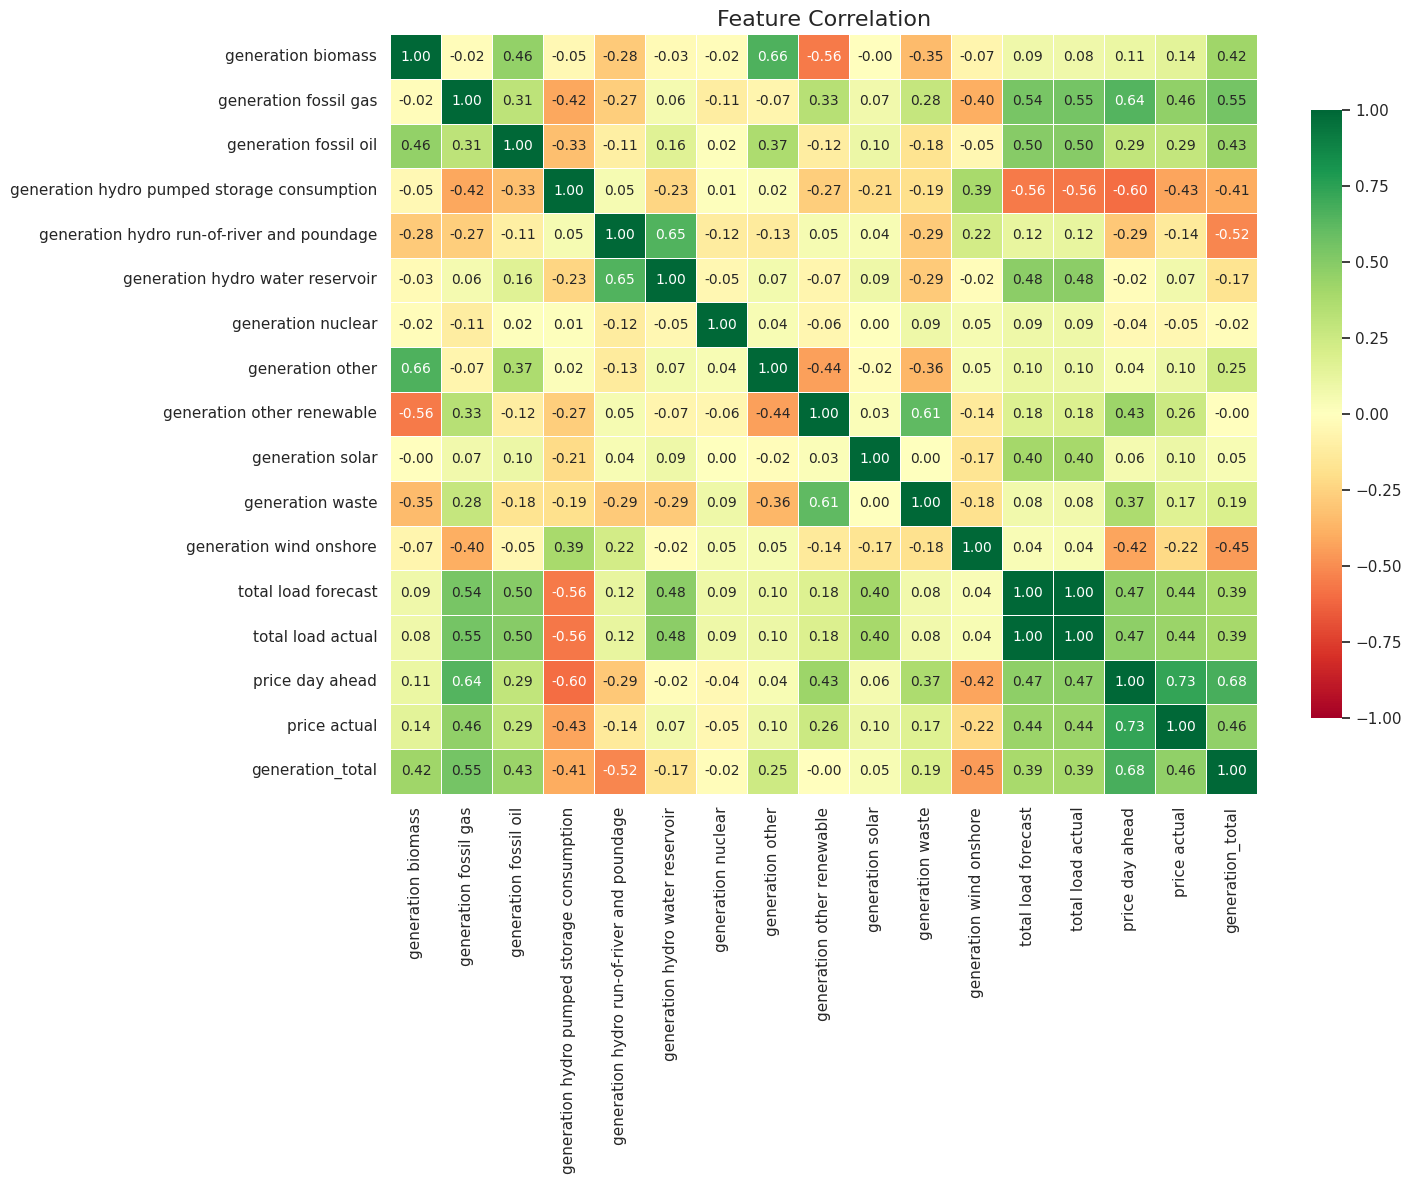

In [ ]:

df_energy_features = (df_energy_features
              .assign(generation_total=df_energy_features['generation fossil hard coal'] + df_energy_features['generation fossil brown coal/lignite'])
              .drop(['generation fossil hard coal', 'generation fossil brown coal/lignite'], axis=1))


feat_corr(df_energy_features)

In [ ]:
import statsmodels.api as sm

In [ ]:
df_weather_features.loc[df_weather_features.pressure > 1050, 'pressure'] = np.nan
df_weather_features.loc[df_weather_features.pressure < 930, 'pressure'] = np.nan

In [ ]:
df_weather_features['pressure'] = df_weather_features['pressure'].where((df_weather_features['pressure'] <= 1051) & (df_weather_features['pressure'] >= 931), other=pd.NA)

In [ ]:

if df_weather_features.index.duplicated().any():
    print("Duplicate index values found.")

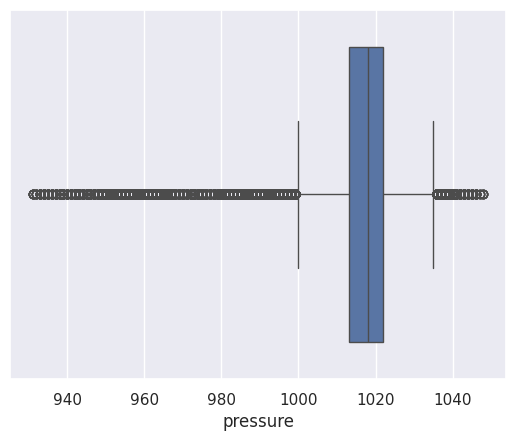

In [ ]:
sns.boxplot(x=df_weather_features['pressure'])
plt.show()

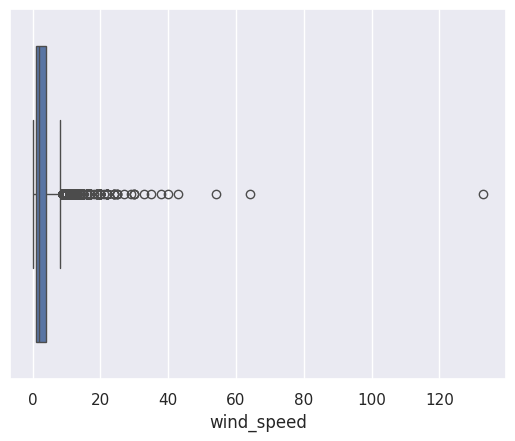

In [ ]:
sns.boxplot(x=df_weather_features['wind_speed'])
plt.show()

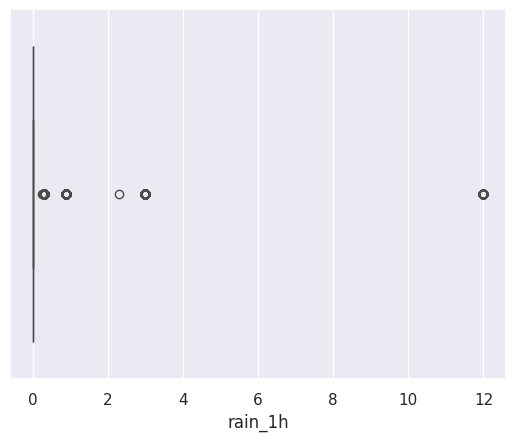

In [ ]:
sns.boxplot(x=df_weather_features['rain_1h'])
plt.show()

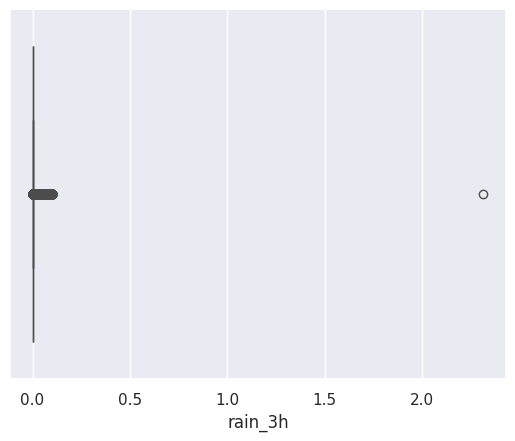

In [ ]:
sns.boxplot(x=df_weather_features['rain_3h'])
plt.show()

In [ ]:
df_weather_features.drop(['rain_3h'], axis = 1 , inplace = True)

In [ ]:
print(f'Number of samples in df_energy is {df_energy_features.shape[0]}')

city_list = df_weather_features['city_name'].unique()
grouped_weather = df_weather_features.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35064
Number of samples in df_weather in Madrid is 35064
Number of samples in df_weather in Bilbao is 35064
Number of samples in df_weather in  Barcelona is 35064
Number of samples in df_weather in Seville is 35064


In [ ]:
df_weather_cleaned = df_weather_features.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time')

In [ ]:
df_weather_cleaned

index city_name     temp  pressure  humidity  \
time                                                                       
2014-12-31 23:00:00+00:00       0  Valencia  270.475    1001.0      77.0   
2015-01-01 00:00:00+00:00       1  Valencia  270.475    1001.0      77.0   
2015-01-01 01:00:00+00:00       2  Valencia  269.686    1002.0      78.0   
2015-01-01 02:00:00+00:00       3  Valencia  269.686    1002.0      78.0   
2015-01-01 03:00:00+00:00       4  Valencia  269.686    1002.0      78.0   
...                           ...       ...      ...       ...       ...   
2018-12-31 18:00:00+00:00  178370   Seville  287.760    1028.0      54.0   
2018-12-31 19:00:00+00:00  178371   Seville  285.760    1029.0      62.0   
2018-12-31 20:00:00+00:00  178372   Seville  285.150    1028.0      58.0   
2018-12-31 21:00:00+00:00  178373   Seville  284.150    1029.0      57.0   
2018-12-31 22:00:00+00:00  178374   Seville  283.970    1029.0      70.0   

                           wind_speed  wind_deg  rain_1h  snow_3h  clouds_all  \
time                                                                            
2014-12-31 23:00:00+00:00         1.0      62.0      0.0      0.0         0.0   
2015-01-01 00:00:00+00:00         1.0      62.0      0.0      0.0         0.0   
2015-01-01 01:00:00+00:00         0.0      23.0      0.0      0.0         0.0   
2015-01-01 02:00:00+00:00         0.0      23.0      0.0      0.0         0.0   
2015-01-01 03:00:00+00:00         0.0      23.0      0.0      0.0         0.0   
...                               ...       ...      ...      ...         ...   
2018-12-31 18:00:00+00:00         3.0      30.0      0.0      0.0         0.0   
2018-12-31 19:00:00+00:00         3.0      30.0      0.0      0.0         0.0   
2018-12-31 20:00:00+00:00         4.0      50.0      0.0      0.0         0.0   
2018-12-31 21:00:00+00:00         4.0      60.0      0.0      0.0         0.0   
2018-12-31 22:00:00+00:00         3.0      50.0      0.0      0.0         0.0   

                           holiday  
time                                
2014-12-31 23:00:00+00:00      1.0  
2015-01-01 00:00:00+00:00      1.0  
2015-01-01 01:00:00+00:00      1.0  
2015-01-01 02:00:00+00:00      1.0  
2015-01-01 03:00:00+00:00      1.0  
...                            ...  
2018-12-31 18:00:00+00:00      1.0  
2018-12-31 19:00:00+00:00      1.0  
2018-12-31 20:00:00+00:00      1.0  
2018-12-31 21:00:00+00:00      1.0  
2018-12-31 22:00:00+00:00      1.0  

[175320 rows x 11 columns]

In [ ]:
print(f'Number of samples in df_energy is {df_energy_features.shape[0]}')

city_list = df_weather_features['city_name'].unique()
grouped_weather = df_weather_cleaned.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35064
Number of samples in df_weather in Madrid is 35064
Number of samples in df_weather in Bilbao is 35064
Number of samples in df_weather in  Barcelona is 35064
Number of samples in df_weather in Seville is 35064


In [ ]:
df_weather_all_cities = [grouped_weather.get_group(x) for x in grouped_weather.groups]

df_weather_all_cities[0]



index   city_name     temp  pressure  humidity  \
time                                                                         
2014-12-31 23:00:00+00:00  107350   Barcelona  281.625    1035.0     100.0   
2015-01-01 00:00:00+00:00  107351   Barcelona  281.625    1035.0     100.0   
2015-01-01 01:00:00+00:00  107352   Barcelona  281.286    1036.0     100.0   
2015-01-01 02:00:00+00:00  107353   Barcelona  281.286    1036.0     100.0   
2015-01-01 03:00:00+00:00  107354   Barcelona  281.286    1036.0     100.0   
...                           ...         ...      ...       ...       ...   
2018-12-31 18:00:00+00:00  142817   Barcelona  284.130    1027.0      71.0   
2018-12-31 19:00:00+00:00  142818   Barcelona  282.640    1027.0      62.0   
2018-12-31 20:00:00+00:00  142819   Barcelona  282.140    1028.0      53.0   
2018-12-31 21:00:00+00:00  142820   Barcelona  281.130    1028.0      50.0   
2018-12-31 22:00:00+00:00  142821   Barcelona  280.130    1028.0     100.0   

                           wind_speed  wind_deg  rain_1h  snow_3h  clouds_all  \
time                                                                            
2014-12-31 23:00:00+00:00         7.0      58.0      0.0      0.0         0.0   
2015-01-01 00:00:00+00:00         7.0      58.0      0.0      0.0         0.0   
2015-01-01 01:00:00+00:00         7.0      48.0      0.0      0.0         0.0   
2015-01-01 02:00:00+00:00         7.0      48.0      0.0      0.0         0.0   
2015-01-01 03:00:00+00:00         7.0      48.0      0.0      0.0         0.0   
...                               ...       ...      ...      ...         ...   
2018-12-31 18:00:00+00:00         1.0     250.0      0.0      0.0         0.0   
2018-12-31 19:00:00+00:00         3.0     270.0      0.0      0.0         0.0   
2018-12-31 20:00:00+00:00         4.0     300.0      0.0      0.0         0.0   
2018-12-31 21:00:00+00:00         5.0     320.0      0.0      0.0         0.0   
2018-12-31 22:00:00+00:00         5.0     310.0      0.0      0.0         0.0   

                           holiday  
time                                
2014-12-31 23:00:00+00:00      1.0  
2015-01-01 00:00:00+00:00      1.0  
2015-01-01 01:00:00+00:00      1.0  
2015-01-01 02:00:00+00:00      1.0  
2015-01-01 03:00:00+00:00      1.0  
...                            ...  
2018-12-31 18:00:00+00:00      1.0  
2018-12-31 19:00:00+00:00      1.0  
2018-12-31 20:00:00+00:00      1.0  
2018-12-31 21:00:00+00:00      1.0  
2018-12-31 22:00:00+00:00      1.0  

[35064 rows x 11 columns]

In [ ]:
# Loop through each DataFrame in the list and drop the 'index' column
for i in range(len(df_weather_all_cities)):
    df_weather_all_cities[i] = df_weather_all_cities[i].drop(['index'], axis=1, errors='ignore')

# Print the first DataFrame in the list (or any specific one)
print(df_weather_all_cities[0])

                            city_name     temp  pressure  humidity  \
time                                                                 
2014-12-31 23:00:00+00:00   Barcelona  281.625    1035.0     100.0   
2015-01-01 00:00:00+00:00   Barcelona  281.625    1035.0     100.0   
2015-01-01 01:00:00+00:00   Barcelona  281.286    1036.0     100.0   
2015-01-01 02:00:00+00:00   Barcelona  281.286    1036.0     100.0   
2015-01-01 03:00:00+00:00   Barcelona  281.286    1036.0     100.0   
...                               ...      ...       ...       ...   
2018-12-31 18:00:00+00:00   Barcelona  284.130    1027.0      71.0   
2018-12-31 19:00:00+00:00   Barcelona  282.640    1027.0      62.0   
2018-12-31 20:00:00+00:00   Barcelona  282.140    1028.0      53.0   
2018-12-31 21:00:00+00:00   Barcelona  281.130    1028.0      50.0   
2018-12-31 22:00:00+00:00   Barcelona  280.130    1028.0     100.0   

                           wind_speed  wind_deg  rain_1h  snow_3h  clouds_all  \
time    

In [ ]:
df_weather_energy = df_energy_features

for df_city in df_weather_all_cities:
    city_name = df_city.iloc[0]['city_name'].replace(' ', '')
    df_temp_city = df_city.add_suffix(f'_{city_name}')
    df_weather_energy = pd.concat([df_weather_energy, df_temp_city], axis=1)
    df_weather_energy = df_weather_energy.drop(f'city_name_{city_name}' , axis=1)

In [ ]:
df_weather_energy.isnull().sum()

generation biomass                             0
generation fossil gas                          0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
                                              ..
wind_deg_Valencia                              0
rain_1h_Valencia                               0
snow_3h_Valencia                               0
clouds_all_Valencia                            0
holiday_Valencia                               0
Length: 62, dtype: int64

In [ ]:
df_weather_energy.duplicated().sum()

0

In [ ]:
df_weather_energy

generation biomass  generation fossil gas  \
time                                                                   
2014-12-31 23:00:00+00:00               447.0                 4844.0   
2015-01-01 00:00:00+00:00               449.0                 5196.0   
2015-01-01 01:00:00+00:00               448.0                 4857.0   
2015-01-01 02:00:00+00:00               438.0                 4314.0   
2015-01-01 03:00:00+00:00               428.0                 4130.0   
...                                       ...                    ...   
2018-12-31 18:00:00+00:00               297.0                 7634.0   
2018-12-31 19:00:00+00:00               296.0                 7241.0   
2018-12-31 20:00:00+00:00               292.0                 7025.0   
2018-12-31 21:00:00+00:00               293.0                 6562.0   
2018-12-31 22:00:00+00:00               290.0                 6926.0   

                           generation fossil oil  \
time                                               
2014-12-31 23:00:00+00:00                  162.0   
2015-01-01 00:00:00+00:00                  158.0   
2015-01-01 01:00:00+00:00                  157.0   
2015-01-01 02:00:00+00:00                  160.0   
2015-01-01 03:00:00+00:00                  156.0   
...                                          ...   
2018-12-31 18:00:00+00:00                  178.0   
2018-12-31 19:00:00+00:00                  174.0   
2018-12-31 20:00:00+00:00                  168.0   
2018-12-31 21:00:00+00:00                  163.0   
2018-12-31 22:00:00+00:00                  163.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2014-12-31 23:00:00+00:00                                        863.0   
2015-01-01 00:00:00+00:00                                        920.0   
2015-01-01 01:00:00+00:00                                       1164.0   
2015-01-01 02:00:00+00:00                                       1503.0   
2015-01-01 03:00:00+00:00                                       1826.0   
...                                                                ...   
2018-12-31 18:00:00+00:00                                          1.0   
2018-12-31 19:00:00+00:00                                          1.0   
2018-12-31 20:00:00+00:00                                         50.0   
2018-12-31 21:00:00+00:00                                        108.0   
2018-12-31 22:00:00+00:00                                        108.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2014-12-31 23:00:00+00:00                                      1051.0   
2015-01-01 00:00:00+00:00                                      1009.0   
2015-01-01 01:00:00+00:00                                       973.0   
2015-01-01 02:00:00+00:00                                       949.0   
2015-01-01 03:00:00+00:00                                       953.0   
...                                                               ...   
2018-12-31 18:00:00+00:00                                      1135.0   
2018-12-31 19:00:00+00:00                                      1172.0   
2018-12-31 20:00:00+00:00                                      1148.0   
2018-12-31 21:00:00+00:00                                      1128.0   
2018-12-31 22:00:00+00:00                                      1069.0   

                           generation hydro water reservoir  \
time                                                          
2014-12-31 23:00:00+00:00                            1899.0   
2015-01-01 00:00:00+00:00                            1658.0   
2015-01-01 01:00:00+00:00                            1371.0   
2015-01-01 02:00:00+00:00                             779.0   
2015-01-01 03:00:00+00:00                             720.0   
...                                                     ...

In [ ]:
df_weather_energy.columns


Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual',
       'generation_total', 'temp_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'snow_3h_Barcelona', 'clouds_all_Barcelona',
       'holiday_Barcelona', 'temp_Bilbao', 'pressure_Bilbao',
       'humidity_Bilbao', 'wind_speed_Bilbao', 'wind_deg_Bilbao',
       'rain_1h_Bilbao', 'snow_3h_Bilbao', 'clouds_all_Bilbao',
       'holiday_Bilbao', 'temp_Madrid', 'pressure_Madrid', 'humidity_Madrid',
       'wind_speed_Madrid', 'wind_deg_Madrid', 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_series(df=None, column=None, series=None,
                label=None, ylabel=None, title=None, start=0, end=None):

    sns.set()

    # Create the figure and axis
    fig, px = plt.subplots(figsize=(12, 6))  # More reasonable default size

    # Set the x-axis label
    px.set_xlabel('Time', fontsize=16)

    # Plot from DataFrame if 'column' is provided
    if df is not None and column is not None:
        # Slice the DataFrame for start:end
        px.plot(df[column].iloc[start:end], label=label)

    # Plot from Series if 'series' is provided
    elif series is not None and not series.empty:
        px.plot(series.iloc[start:end], label=label)

    # Set the y-axis label if provided
    if ylabel:
        px.set_ylabel(ylabel, fontsize=16)

    # Set the title if provided
    if title:
        px.set_title(title, fontsize=24)

    # Add legend if label is provided
    if label:
        px.legend(fontsize=16)

    # Enable grid
    px.grid(True)

    # Return the axis object
    return px

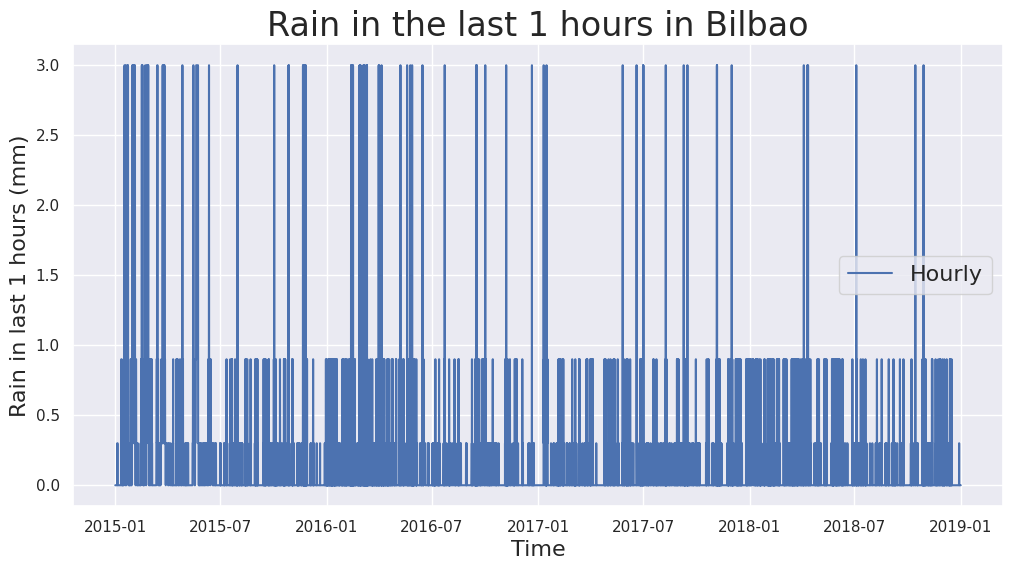

In [ ]:
px = plot_series(df_weather_energy, 'rain_1h_Bilbao',
                 label='Hourly', ylabel='Rain in last 1 hours (mm)',
                 title='Rain in the last 1 hours in Bilbao')
plt.show()

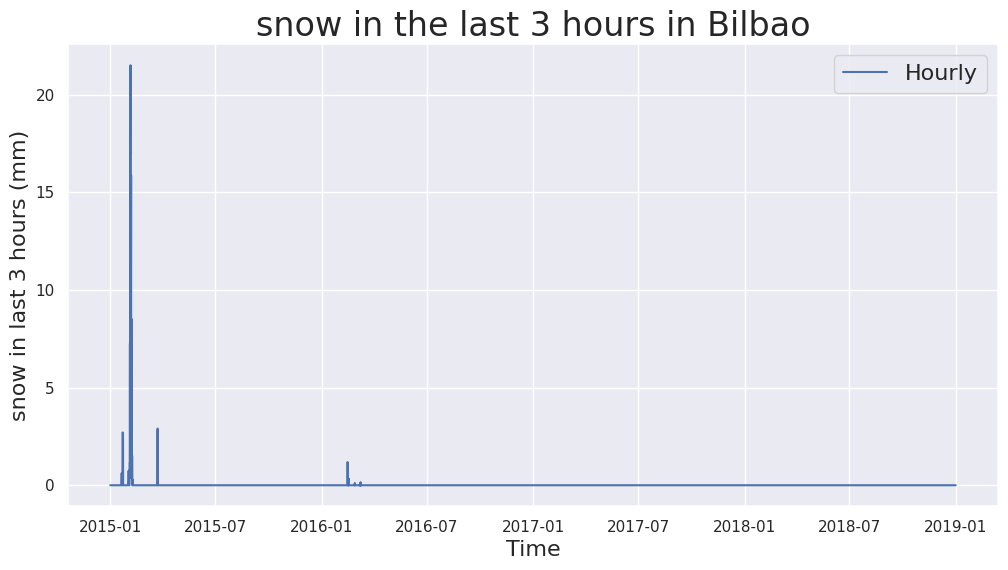

In [ ]:
px = plot_series(df_weather_energy, 'snow_3h_Bilbao',
                 label='Hourly', ylabel='snow in last 3 hours (mm)',
                 title='snow in the last 3 hours in Bilbao')
plt.show()

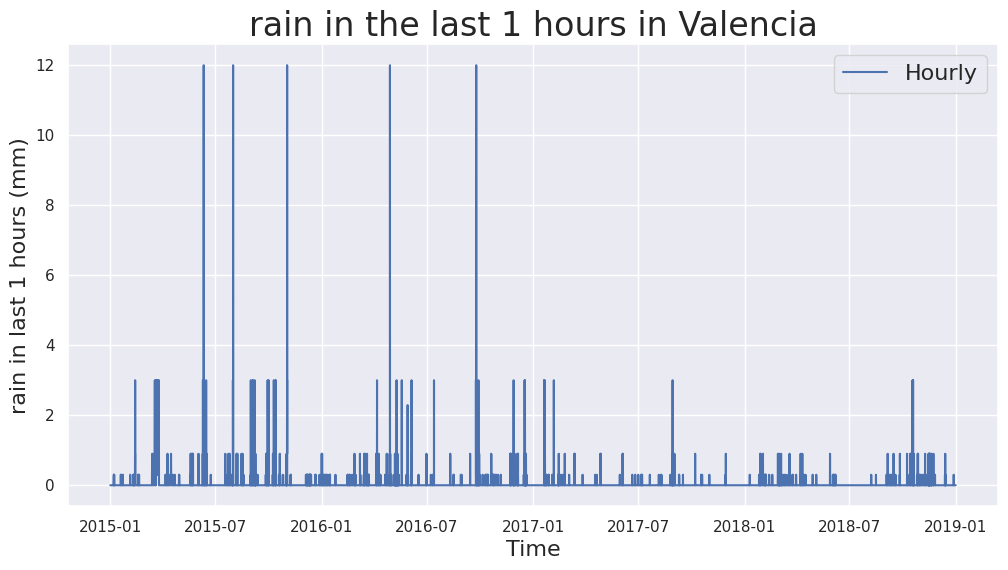

In [ ]:
px = plot_series(df_weather_energy, 'rain_1h_Valencia',
                 label='Hourly', ylabel='rain in last 1 hours (mm)',
                 title='rain in the last 1 hours in Valencia')
plt.show()

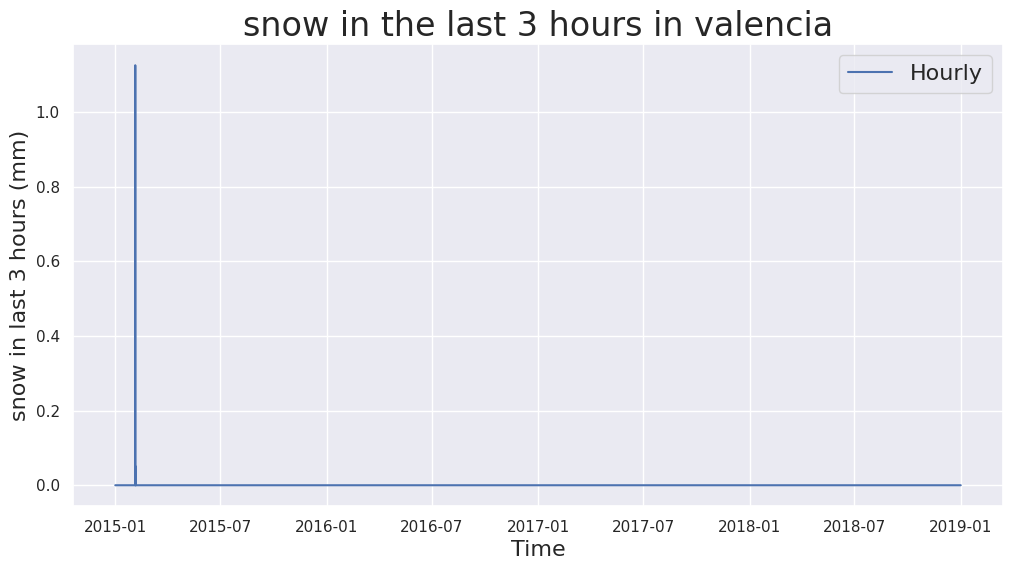

In [ ]:
px = plot_series(df_weather_energy, 'snow_3h_Valencia',
                 label='Hourly', ylabel='snow in last 3 hours (mm)',
                 title='snow in the last 3 hours in valencia')
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare data
time_index = df_weather_energy.index
price_actual = df_weather_energy["price actual"]
daily_rolling = price_actual.rolling(window=24).mean()
weekly_rolling = price_actual.rolling(window=24*7).mean()

# Create subplot
fig = make_subplots()

# Add traces for actual price, daily average, and weekly average with custom colors
fig.add_trace(go.Scatter(x=time_index, y=price_actual, mode='lines', name="price actual", line=dict(color='blue')))
fig.add_trace(go.Scatter(x=time_index, y=daily_rolling, mode='lines', name="rolling window = daily ave", line=dict(color='green')))
fig.add_trace(go.Scatter(x=time_index, y=weekly_rolling, mode='lines', name="rolling window = weekly ave", line=dict(color='orange')))

# Optionally, add range slider (uncomment if needed)
# fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()


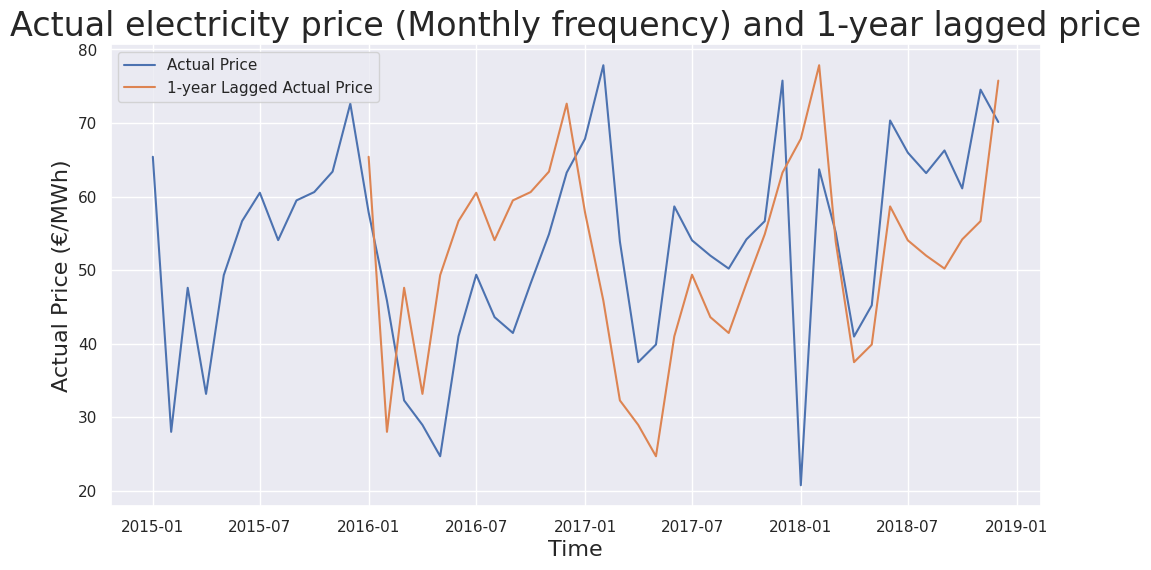

In [ ]:
monthly_price = df_weather_energy['price actual'].asfreq('ME')
ax = plot_series(series=monthly_price, ylabel='Actual Price (€/MWh)',
                 title='Actual electricity price (Monthly frequency) and 1-year lagged price')
shifted = df_weather_energy['price actual'].asfreq('ME').shift(12)
ax.plot(shifted, label='Hourly')
ax.legend(['Actual Price', '1-year Lagged Actual Price'])
plt.show()

In [ ]:
df_weather_energy['hour'] = df_weather_energy.index.to_series().apply(lambda x: x.hour)
df_weather_energy['weekday'] = df_weather_energy.index.to_series().apply(lambda x: x.weekday())
df_weather_energy['month'] = df_weather_energy.index.to_series().apply(lambda x: x.month)
df_weather_energy['year'] = df_weather_energy.index.to_series().apply(lambda x: x.year)

Text(0.5, 1.0, 'Daily actual price (0 is starting with Monday)')

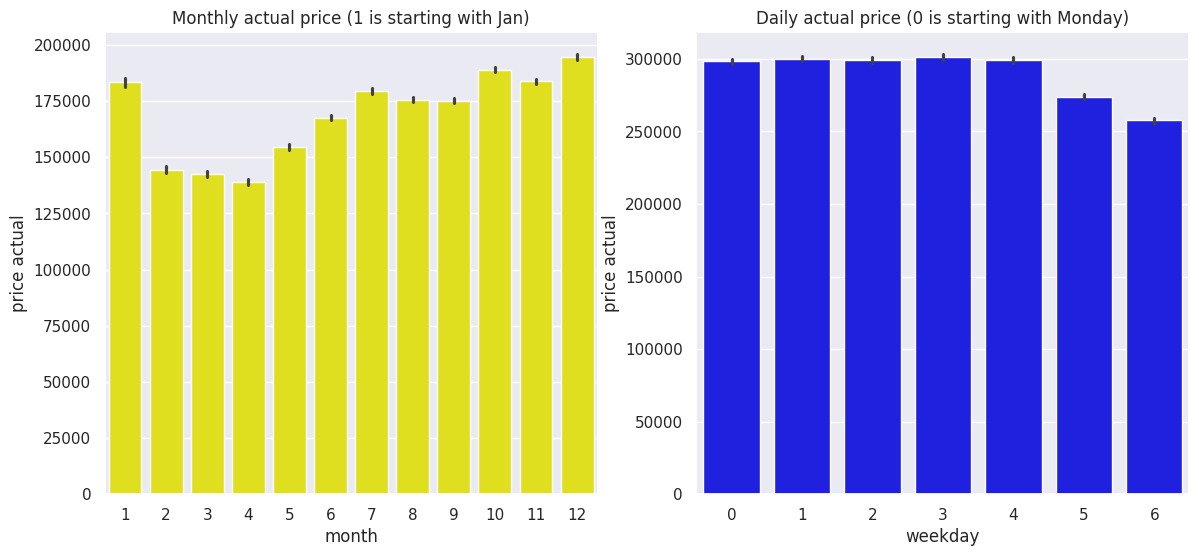

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
sns.set(style="darkgrid")

sns.barplot(
    x="month",
    y="price actual",
    data=df_weather_energy,
    estimator=sum,
    color='yellow',
    ax=axes[0]);
axes[0].set_title('Monthly actual price (1 is starting with Jan)')

sns.barplot(
    x="weekday",
    y="price actual",
    data=df_weather_energy,
    estimator=sum,
    color='blue',
    ax=axes[1]);
axes[1].set_title('Daily actual price (0 is starting with Monday)')

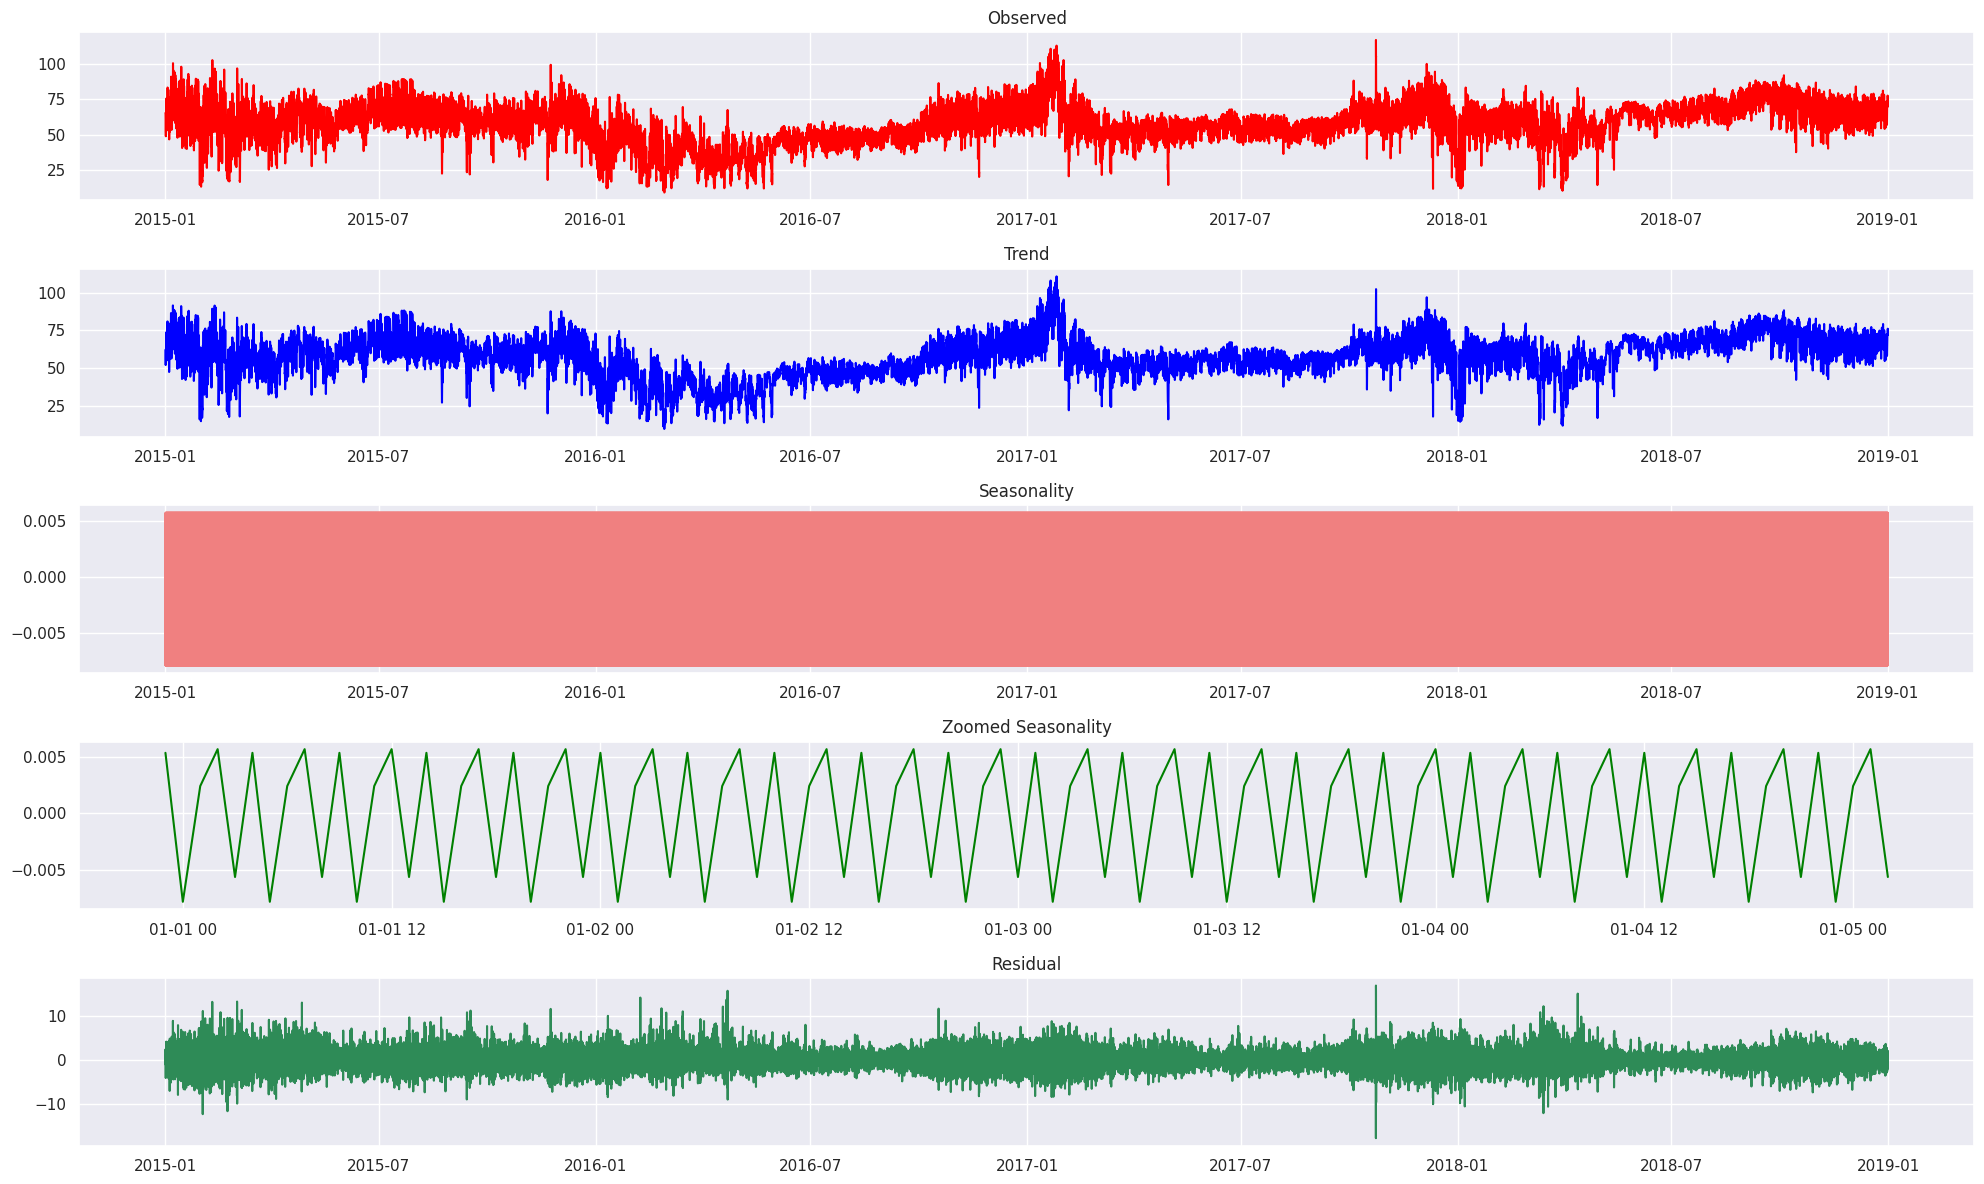

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decompose_result = seasonal_decompose(df_weather_energy['price actual'], period=5, model='additive')

# Components to plot
components = {
    'Observed': decompose_result.observed,
    'Trend': decompose_result.trend,
    'Seasonality': decompose_result.seasonal,
    'Zoomed Seasonality': decompose_result.seasonal[:100],
    'Residual': decompose_result.resid
}
colors = ['red', 'blue', 'lightcoral', 'green', 'seagreen']

# Plot components in a loop
fig, axes = plt.subplots(5, 1, figsize=(20, 12))
for ax, (title, data), color in zip(axes, components.items(), colors):
    ax.plot(data, color=color)
    ax.set_title(title)

fig.tight_layout()
plt.show()


In [ ]:
result = adfuller(df_weather_energy[['price actual']])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -9.147016232851248
p-value: 2.750493484933306e-15
Critical Values: {'1%': -3.4305367814665044, '5%': -2.8616225527935106, '10%': -2.566813940257257}


In [ ]:
result = adfuller(df_weather_energy[['total load actual']])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -21.420315756960584
p-value: 0.0
Critical Values: {'1%': -3.43053679213716, '5%': -2.8616225575095284, '10%': -2.566813942767471}


Conclusion: The time series is stationary, so no additional differencing is needed.

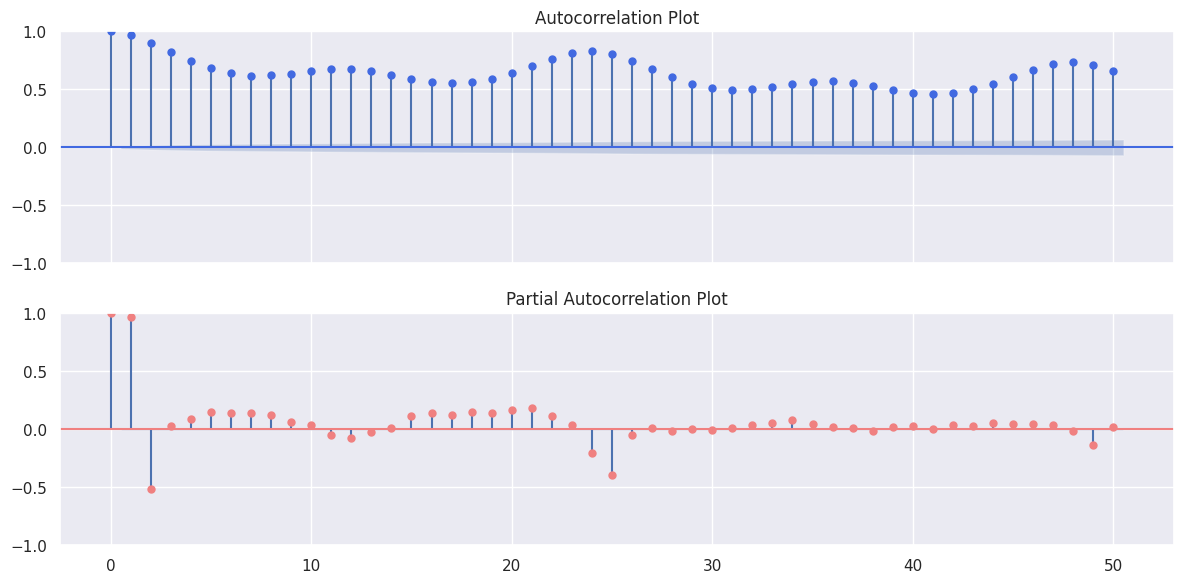

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Define plot settings for autocorrelation and partial autocorrelation
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
titles = ['Autocorrelation Plot', 'Partial Autocorrelation Plot']
colors = ['royalblue', 'lightcoral']
plots = [plot_acf, plot_pacf]

# Loop through each plot type
for i, plot_func in enumerate(plots):
    plot_func(df_weather_energy['price actual'], lags=50, ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()


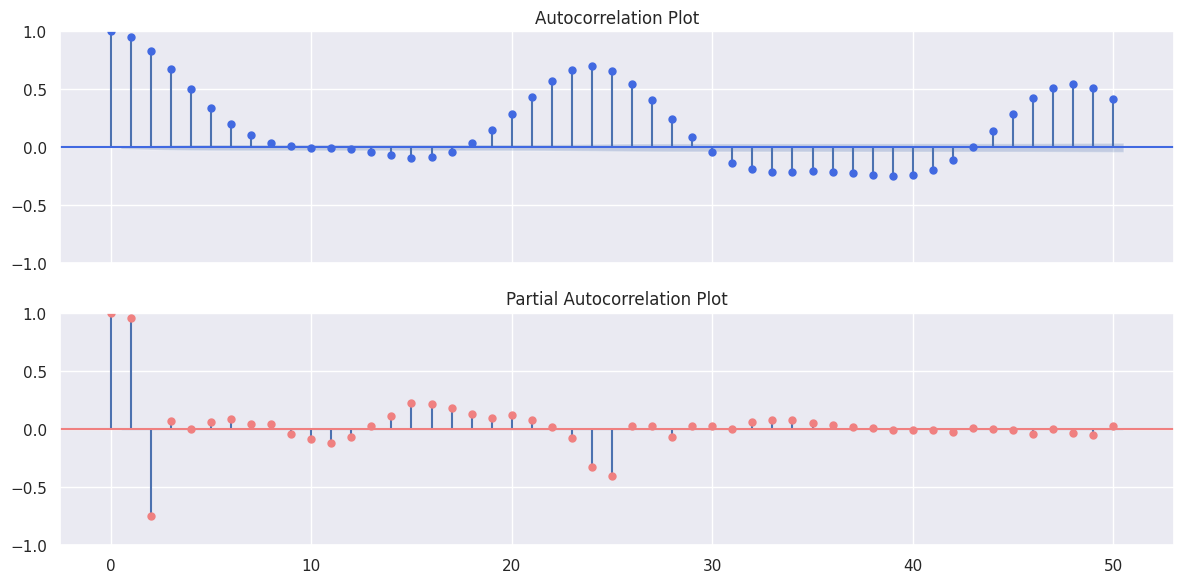

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
titles = ['Autocorrelation Plot', 'Partial Autocorrelation Plot']
colors = ['royalblue', 'lightcoral']
plots = [plot_acf, plot_pacf]

# Loop through each plot type
for i, plot_func in enumerate(plots):
    plot_func(df_weather_energy['total load actual'], lags=50, ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()


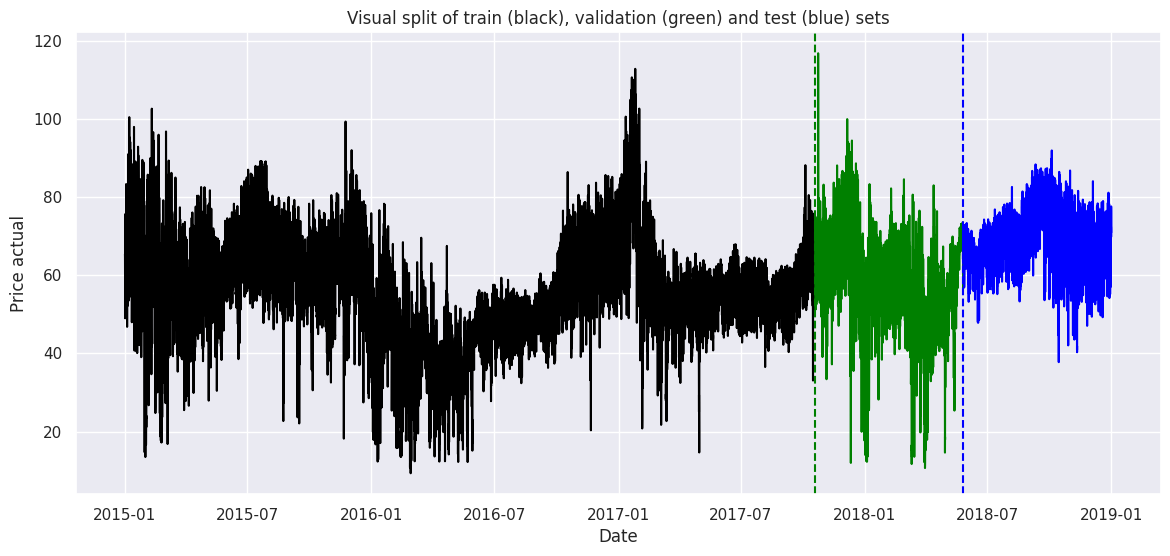

In [ ]:
import matplotlib.pyplot as plt

train_cutoff = int(len(df_weather_energy) * 0.7)  # Example: 70% for training
val_cutoff = int(len(df_weather_energy) * 0.85)  # Example: 15% for validation (85% - 70%)

fig, axes = plt.subplots(figsize=(14, 6))
axes.plot(df_weather_energy['price actual'].iloc[:train_cutoff], color='black')
axes.plot(df_weather_energy['price actual'].iloc[train_cutoff + 1:val_cutoff], color='green')
axes.plot(df_weather_energy['price actual'].iloc[val_cutoff + 1:], color='blue')
axes.axvline(x=df_weather_energy.index[train_cutoff], color='green', linestyle='--')
axes.axvline(x=df_weather_energy.index[val_cutoff], color='blue', linestyle='--')
axes.set_title('Visual split of train (black), validation (green) and test (blue) sets')
axes.set_xlabel('Date')
axes.set_ylabel('Price actual')
plt.show()

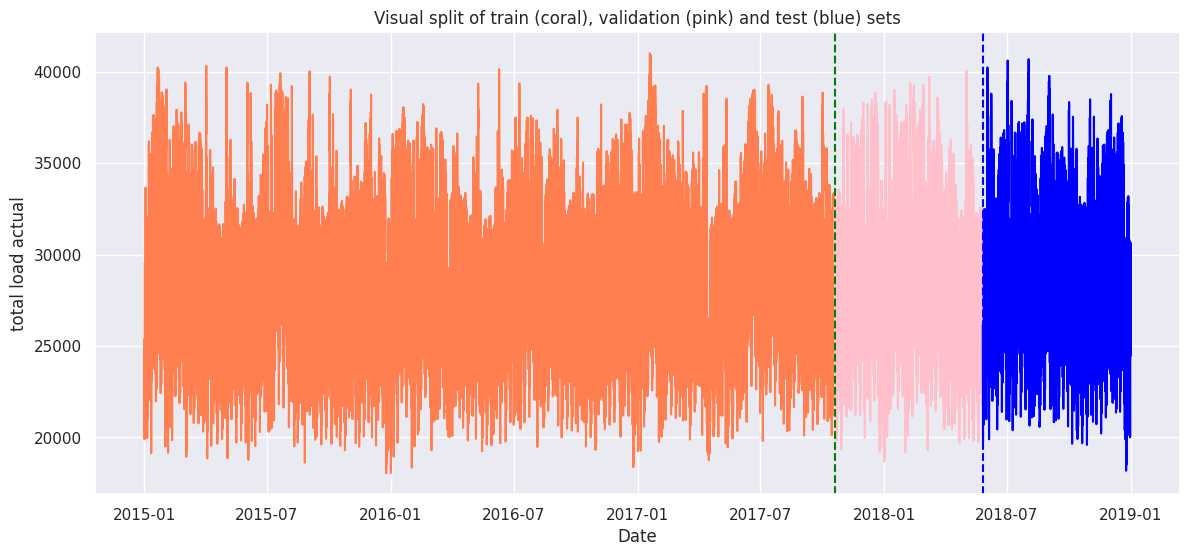

In [ ]:
train_cutoff = int(len(df_weather_energy) * 0.7)  # Example: 70% for training
val_cutoff = int(len(df_weather_energy) * 0.85)  # Example: 15% for validation (85% - 70%)

fig, axes = plt.subplots(figsize=(14, 6))
axes.plot(df_weather_energy['total load actual'].iloc[:train_cutoff], color='coral')
axes.plot(df_weather_energy['total load actual'].iloc[train_cutoff + 1:val_cutoff], color='pink')
axes.plot(df_weather_energy['total load actual'].iloc[val_cutoff + 1:], color='blue')
axes.axvline(x=df_weather_energy.index[train_cutoff], color='green', linestyle='--')
axes.axvline(x=df_weather_energy.index[val_cutoff], color='blue', linestyle='--')
axes.set_title('Visual split of train (coral), validation (pink) and test (blue) sets')
axes.set_xlabel('Date')
axes.set_ylabel('total load actual')
plt.show()

XG BOOST MODEL

[0]	train-rmse:11.38927	eval-rmse:11.33749
[1]	train-rmse:9.49666	eval-rmse:9.54363
[2]	train-rmse:8.24840	eval-rmse:8.37787
[3]	train-rmse:7.38621	eval-rmse:7.60264
[4]	train-rmse:6.77502	eval-rmse:7.03955
[5]	train-rmse:6.33795	eval-rmse:6.64540
[6]	train-rmse:5.95068	eval-rmse:6.31109
[7]	train-rmse:5.65098	eval-rmse:6.05233
[8]	train-rmse:5.34229	eval-rmse:5.78414
[9]	train-rmse:4.98549	eval-rmse:5.45353
[10]	train-rmse:4.83535	eval-rmse:5.31613
[11]	train-rmse:4.70675	eval-rmse:5.21496
[12]	train-rmse:4.52258	eval-rmse:5.04659
[13]	train-rmse:4.40622	eval-rmse:4.93890
[14]	train-rmse:4.31609	eval-rmse:4.86779
[15]	train-rmse:4.23425	eval-rmse:4.79228
[16]	train-rmse:4.16175	eval-rmse:4.72743
[17]	train-rmse:4.04820	eval-rmse:4.62982
[18]	train-rmse:3.95808	eval-rmse:4.56161
[19]	train-rmse:3.89846	eval-rmse:4.50902
[20]	train-rmse:3.84802	eval-rmse:4.45727
[21]	train-rmse:3.81566	eval-rmse:4.43067
[22]	train-rmse:3.77556	eval-rmse:4.38767
[23]	train-rmse:3.72363	eval-rmse:4.34813


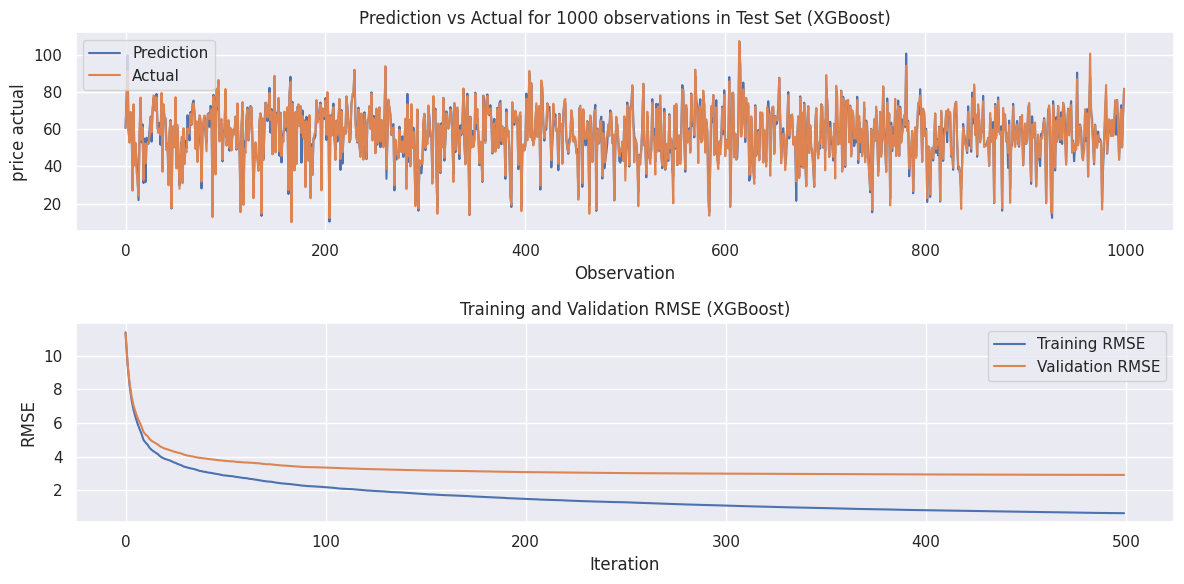

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import pandas as pd
import numpy as np

# Assuming 'df_weather_energy' is already loaded as a DataFrame
# Step 1: Prepare features (X) and target (y)
X = df_weather_energy.drop(['price actual'], axis=1)
y = df_weather_energy['price actual']

# Step 2: Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Convert Data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 4: Define Parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'random_state': 42,
    'eval_metric': 'rmse',  # Metric to evaluate during training
}

# Step 5: Train XGBoost Model with Early Stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
evals_result = {}  # To store the evaluation results

xgboost_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,  # Maximum number of boosting rounds
    early_stopping_rounds=10,  # Stop training if no improvement after 10 rounds
    evals=evals,
    evals_result=evals_result,  # Store evaluation results here
    verbose_eval=True
)

# Step 6: Make Predictions
y_pred = xgboost_model.predict(dtest)

# Step 7: Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Calculate Accuracy as 1 - (Normalized MAE)
mean_actual = np.mean(y_test)
accuracy = (1 - (mae / mean_actual)) * 100

# Print Results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# Plot Results using the plot_results function
def plot_results(y_pred, y_test, evals_result, model_name):
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))

    # Plotting prediction vs actual for the first 1000 observations
    ax[0].plot(y_pred[:1000], label='Prediction')
    ax[0].plot(y_test[:1000].values, label='Actual')
    ax[0].legend(loc='upper left')
    ax[0].set_title(f'Prediction vs Actual for 1000 observations in Test Set ({model_name})')
    ax[0].set_xlabel('Observation')
    ax[0].set_ylabel('price actual')

    # Extract training and validation RMSE from evals_result
    train_rmse = evals_result['train']['rmse']
    val_rmse = evals_result['eval']['rmse']

    # Plot RMSE for training and validation
    ax[1].plot(train_rmse, label='Training RMSE')
    ax[1].plot(val_rmse, label='Validation RMSE')

    ax[1].legend()
    ax[1].set_title(f'Training and Validation RMSE ({model_name})')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('RMSE')

    fig.tight_layout()
    plt.show()

# Call the function to plot results
plot_results(y_pred, y_test, evals_result, 'XGBoost')

[0]	train-rmse:3223.45802	eval-rmse:3247.51617
[1]	train-rmse:2280.16447	eval-rmse:2302.82134
[2]	train-rmse:1627.23376	eval-rmse:1649.82824
[3]	train-rmse:1180.38659	eval-rmse:1204.05018
[4]	train-rmse:879.86241	eval-rmse:906.13044
[5]	train-rmse:683.60161	eval-rmse:712.63274
[6]	train-rmse:560.72581	eval-rmse:592.44403
[7]	train-rmse:486.45202	eval-rmse:520.86192
[8]	train-rmse:442.20571	eval-rmse:479.34657
[9]	train-rmse:415.27903	eval-rmse:454.56851
[10]	train-rmse:398.29575	eval-rmse:437.67499
[11]	train-rmse:386.37849	eval-rmse:426.42089
[12]	train-rmse:376.95510	eval-rmse:418.64664
[13]	train-rmse:368.77415	eval-rmse:411.59055
[14]	train-rmse:361.27884	eval-rmse:405.95663
[15]	train-rmse:355.99736	eval-rmse:402.29231
[16]	train-rmse:350.14027	eval-rmse:396.42569
[17]	train-rmse:346.25532	eval-rmse:394.40096
[18]	train-rmse:341.48924	eval-rmse:390.65301
[19]	train-rmse:337.67796	eval-rmse:387.01968
[20]	train-rmse:334.32903	eval-rmse:384.12726
[21]	train-rmse:330.43209	eval-rmse:

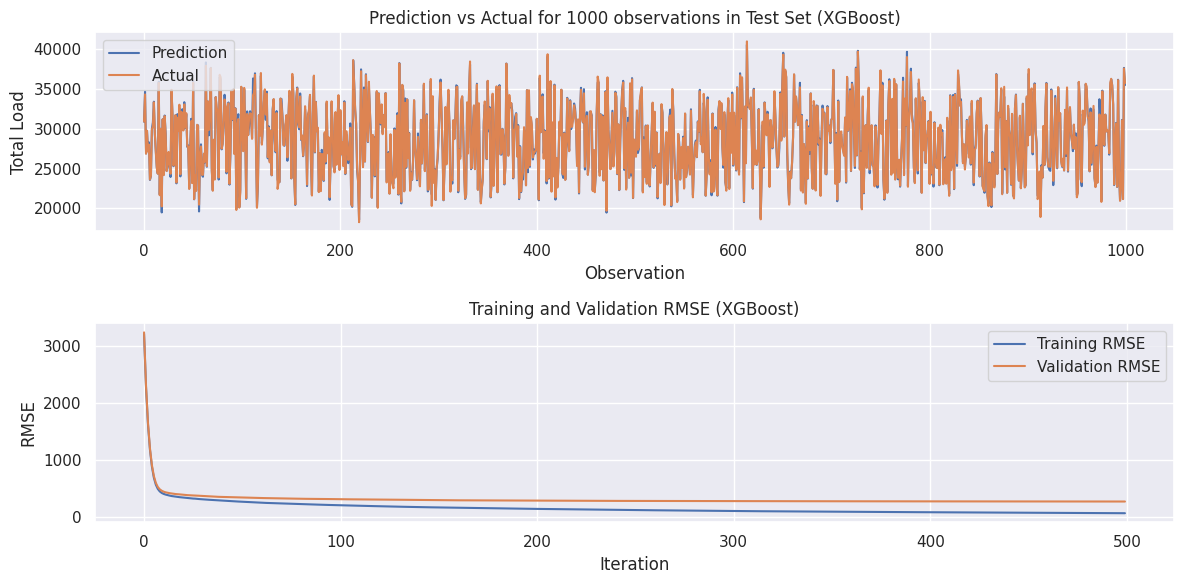

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import pandas as pd
import numpy as np

# Assuming 'df_weather_energy' is already loaded as a DataFrame
# Step 1: Prepare features (X) and target (y)
X = df_weather_energy.drop(['total load actual'], axis=1)
y = df_weather_energy['total load actual']

# Step 2: Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Convert Data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 4: Define Parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'random_state': 42,
    'eval_metric': 'rmse',  # Metric to evaluate during training
}

# Step 5: Train XGBoost Model with Early Stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
evals_result = {}  # To store the evaluation results

xgboost_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,  # Maximum number of boosting rounds
    early_stopping_rounds=10,  # Stop training if no improvement after 10 rounds
    evals=evals,
    evals_result=evals_result,  # Store evaluation results here
    verbose_eval=True
)

# Step 6: Make Predictions
y_pred = xgboost_model.predict(dtest)

# Step 7: Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Calculate Accuracy as 1 - (Normalized MAE)
mean_actual = np.mean(y_test)
accuracy = (1 - (mae / mean_actual)) * 100

# Print Results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# Plot Results using the plot_results function
def plot_results(y_pred, y_test, evals_result, model_name):
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))

    # Plotting prediction vs actual for the first 1000 observations
    ax[0].plot(y_pred[:1000], label='Prediction')
    ax[0].plot(y_test[:1000].values, label='Actual')
    ax[0].legend(loc='upper left')
    ax[0].set_title(f'Prediction vs Actual for 1000 observations in Test Set ({model_name})')
    ax[0].set_xlabel('Observation')
    ax[0].set_ylabel('Total Load')

    # Extract training and validation RMSE from evals_result
    train_rmse = evals_result['train']['rmse']
    val_rmse = evals_result['eval']['rmse']

    # Plot RMSE for training and validation
    ax[1].plot(train_rmse, label='Training RMSE')
    ax[1].plot(val_rmse, label='Validation RMSE')

    ax[1].legend()
    ax[1].set_title(f'Training and Validation RMSE ({model_name})')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('RMSE')

    fig.tight_layout()
    plt.show()

# Call the function to plot results
plot_results(y_pred, y_test, evals_result, 'XGBoost')
